In [27]:
%load_ext autoreload
%autoreload 2
import sys
# sys.path.append("D:/Github/note/module")                        # for windows
sys.path.append("/Users/xinc./Documents/GitHub/note/module")    # for mac
from glob import glob
from get_info_TWSE import GetInfoTWSE
from get_info_FinMind import GetInfoFinMind
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.sandwich_covariance import cov_hac
from linearmodels.panel import FamaMacBeth
from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# get data

In [89]:
list = pd.read_csv("stock_id_list.csv")
list = list["Code"].to_list()

In [37]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

TWSE_fetcher = GetInfoTWSE()
FinMind_fetcher = GetInfoFinMind(cerify = False)
files = glob("data\\*.csv")

stock_price_failed_lt = []
margin_info_complete_lt = []
margin_info_failed_lt = []
holding_info_complete_lt = []
holding_info_failed_lt = []

In [ ]:
for id in tqdm(list):
    try:
        df = fetcher.init_df(str(id), "2020-01-01", "2025-09-04")
        df = fetcher.get_stock_price()
        df = fetcher.get_day_trading_info()
        df = df[df["不能做空當沖"] != "Y"]
        df.to_csv(f"data/{id}.csv", index = True)
    except:
        stock_price_lt.append(id)
        continue

  2%|▏         | 23/1066 [1:09:12<37:15:10, 128.58s/it]

In [ ]:
"""merge margin info"""

for f in files:
    stock_id = f.split("\\")[-1].replace(".csv", "")
    base_df = pd.read_csv(f, index_col = "Date")
    try:
        if stock_id in margin_info_complete_lt:
            continue
        
        start_time = base_df.index[0]
        end_time = base_df.index[-1]

        if base_df.empty:
            print(f"{stock_id} is empty")
            continue

        df = FinMind_fetcher.init_df(stock_id, start_time, end_time)
        df = FinMind_fetcher.get_margin_info()
        base_df = base_df.join(df, how = "left")
        base_df.to_csv(f"data/{stock_id}.csv")
        margin_info_complete_lt.append(stock_id)

    except Exception as e:
        margin_info_failed_lt.append(stock_id)
        print(e)
        continue

2025-09-12 22:58:16.607 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockMarginPurchaseShortSale, data_id: 1101
2025-09-12 22:58:17.076 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockMarginPurchaseShortSale, data_id: 1101B
2025-09-12 22:58:17.250 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockMarginPurchaseShortSale, data_id: 1102
2025-09-12 22:58:17.767 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockMarginPurchaseShortSale, data_id: 1103
2025-09-12 22:58:18.255 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockMarginPurchaseShortSale, data_id: 1104
2025-09-12 22:58:18.678 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockMarginPurchaseShortSale, data_id: 1108
2025-09-12 22:58:18.958 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockMarginPurchaseShortSale, data_

In [38]:
"""get holding structure per"""

for f in files:
    stock_id = f.split("\\")[-1].replace(".csv", "")
    base_df = pd.read_csv(f, index_col = "Date")
    try:
        if stock_id in holding_info_complete_lt:
            continue

        start_time = base_df.index[0]
        end_time = base_df.index[-1]
        if base_df.empty:
            print(f"{stock_id} is empty")
            continue
        
        df = FinMind_fetcher.init_df(stock_id, start_time, end_time)
        df = FinMind_fetcher.get_share_holding()
        df = FinMind_fetcher.get_stock_holding_share_per()
        base_df = base_df.join(df, how = "left")
        base_df.to_csv(f"data/{stock_id}.csv")
        holding_info_complete_lt.append(stock_id)

    except Exception as e:
        holding_info_failed_lt.append(stock_id)
        print(e)
        continue

2025-09-14 14:43:19.167 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1101
2025-09-14 14:43:19.466 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1101', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:19.475 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1101B


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:19.715 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1101B', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:19.731 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1102
2025-09-14 14:43:19.884 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1102', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:19.898 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1103


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:20.193 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1103', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:20.205 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1104
2025-09-14 14:43:20.348 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1104', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:20.360 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1108


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:20.653 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1108', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:20.671 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1109
2025-09-14 14:43:20.824 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1109', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:20.835 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1110


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:21.253 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 1110
2025-09-14 14:43:21.402 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockHoldingSharesPer: 'TaiwanStockHoldingSharesPer'>, 'data_id': '1110', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:21.419 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1201


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:21.661 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1201', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:21.672 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1203
2025-09-14 14:43:21.821 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1203', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:21.837 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1210


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:22.125 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1210', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:22.135 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1213
2025-09-14 14:43:22.282 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1213', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:22.295 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1215


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:22.540 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1215', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:22.554 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1216
2025-09-14 14:43:22.704 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1216', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:22.719 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1217


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:22.867 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1217', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:22.881 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1218


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:23.122 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1218', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:23.135 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1219


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:23.381 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1219', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:23.393 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1220


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:23.632 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1220', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:23.643 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1225
2025-09-14 14:43:23.794 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1225', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:23.806 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1227


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:24.092 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1227', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:24.104 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1229
2025-09-14 14:43:24.253 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1229', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:24.264 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1231


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:24.450 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1231', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:24.463 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1232
2025-09-14 14:43:24.605 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1232', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:24.619 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1233


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:24.860 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1233', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:24.872 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1234


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:25.107 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1234', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:25.120 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1235


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:25.363 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1235', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:25.374 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1236
2025-09-14 14:43:25.528 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1236', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:25.538 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1256


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:25.781 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1256', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:25.793 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1301
2025-09-14 14:43:25.943 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1301', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:25.957 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1303


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:26.100 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1303', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:26.112 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1304


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:26.395 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1304', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:26.407 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1305


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:26.654 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1305', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:26.666 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1307


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:26.950 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1307', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:26.961 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1308
2025-09-14 14:43:27.107 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1308', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:27.120 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1309


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:27.262 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1309', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:27.273 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1310
2025-09-14 14:43:27.422 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1310', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:27.433 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1312


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:27.675 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1312', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:27.684 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1312A
2025-09-14 14:43:27.831 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1312A', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-02', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:27.843 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1313


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:28.082 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1313', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:28.094 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1314


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:28.339 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1314', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:28.353 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1315


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:28.594 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1315', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:28.606 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1316
2025-09-14 14:43:28.753 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1316', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:28.765 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1319


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:28.912 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1319', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:28.935 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1321
2025-09-14 14:43:29.084 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1321', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:29.110 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1323


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:29.352 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1323', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:29.372 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1324
2025-09-14 14:43:29.519 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1324', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:29.540 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1325


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:29.690 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1325', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:29.713 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1326


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:29.999 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1326', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:30.039 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1337
2025-09-14 14:43:30.191 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1337', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:30.216 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1338
2025-09-14 14:43:30.498 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1338', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:30.527 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1339
2025-09-14 14:43:30.674 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1339', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:30.698 | INFO     | FinMind.data.finmind_api:get_data:158 - download Datase

{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:30.954 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1340', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:30.975 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1341


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:31.222 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1341', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:31.245 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1342
2025-09-14 14:43:31.388 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1342', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-11-24', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:31.412 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1402


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:31.691 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1402', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:31.711 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1409
2025-09-14 14:43:31.859 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1409', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:31.879 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1410


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:32.115 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1410', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:32.139 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1413
2025-09-14 14:43:32.290 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1413', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:32.327 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1414


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:32.614 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1414', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:32.639 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1416
2025-09-14 14:43:32.785 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1416', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:32.812 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1417


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:33.055 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1417', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:33.086 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1418
2025-09-14 14:43:33.235 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1418', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:33.257 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1419


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:33.399 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1419', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:33.421 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1423


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:33.662 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1423', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:33.678 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1432
2025-09-14 14:43:33.830 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1432', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:33.855 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1434


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:34.096 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1434', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:34.113 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1435
2025-09-14 14:43:34.260 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1435', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:34.307 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1436
2025-09-14 14:43:34.456 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1436', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:34.475 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1437


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:34.722 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1437', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:34.741 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1438


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:34.932 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1438', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:34.956 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1439


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:35.205 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1439', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:35.236 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1440


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:35.423 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1440', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:35.443 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1441


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:35.680 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1441', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:35.704 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1442


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:35.959 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1442', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:36.002 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1443


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:36.255 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1443', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:36.276 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1444
2025-09-14 14:43:36.431 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1444', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:36.454 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1445


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:36.730 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1445', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:36.754 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1446


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:36.999 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1446', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:37.026 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1447
2025-09-14 14:43:37.175 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1447', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:37.229 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1449
2025-09-14 14:43:37.471 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1449', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:37.501 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1451
2025-09-14 14:43:37.653 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1451', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:37.690 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1452
2025-09-14 14:43:37.840 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1452', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:37.868 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1453


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:38.114 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1453', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:38.154 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1454
2025-09-14 14:43:38.310 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1454', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:38.337 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1455
2025-09-14 14:43:38.616 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1455', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:38.637 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1456
2025-09-14 14:43:38.790 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1456', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:38.827 | INFO     | FinMind.data.finmind_api:get_data:158 - download Datase

{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:39.133 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1457', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:39.157 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1459


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:39.398 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1459', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:39.420 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1460
2025-09-14 14:43:39.574 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1460', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:39.598 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1463


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:39.787 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1463', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:39.811 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1464
2025-09-14 14:43:39.965 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1464', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:39.987 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1465


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:40.281 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1465', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:40.304 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1466


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:40.554 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1466', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:40.576 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1467


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:40.830 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1467', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:40.849 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1468


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:41.454 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 1468
2025-09-14 14:43:41.713 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockHoldingSharesPer: 'TaiwanStockHoldingSharesPer'>, 'data_id': '1468', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:41.738 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1470
2025-09-14 14:43:41.882 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1470', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:41.906 | INFO     | FinMind.data.finmind_api:get_data:158 - dow

{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:42.056 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1471', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:42.089 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1472
2025-09-14 14:43:42.233 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1472', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:42.276 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1473
2025-09-14 14:43:42.525 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1473', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:42.568 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1474


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:42.818 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1474', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:42.841 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1475
2025-09-14 14:43:42.986 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1475', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-03', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:43.017 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1476


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:43.266 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1476', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:43.290 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1477
2025-09-14 14:43:43.429 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1477', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:43.452 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1503


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:43.744 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1503', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:43.767 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1504
2025-09-14 14:43:43.922 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1504', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:43.937 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1506


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:44.122 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1506', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:44.139 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1512
2025-09-14 14:43:44.291 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1512', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:44.314 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1513


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:44.558 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1513', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:44.593 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1514


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:44.847 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1514', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:44.870 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1515


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:45.122 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1515', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:45.141 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1516


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:45.392 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1516', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:45.415 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1517
2025-09-14 14:43:45.563 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1517', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:45.587 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1519


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:45.782 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1519', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:45.824 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1521


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:46.080 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1521', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:46.112 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1522
2025-09-14 14:43:46.259 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1522', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:46.274 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1522A


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:46.420 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1522A', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2021-08-10', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:46.441 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1524
2025-09-14 14:43:46.592 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1524', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:46.611 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1525


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:46.864 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1525', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:46.888 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1526
2025-09-14 14:43:47.038 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1526', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:47.062 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1527


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:47.300 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1527', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:47.324 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1528


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:47.511 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1528', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:47.540 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1529


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:47.792 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1529', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:47.811 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1530
2025-09-14 14:43:47.955 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1530', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:47.979 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1531


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:48.239 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1531', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:48.271 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1532


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:48.524 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1532', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:48.559 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1533
2025-09-14 14:43:48.702 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1533', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:48.730 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1535


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:48.883 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1535', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:48.942 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1536


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:49.129 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1536', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:49.161 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1537
2025-09-14 14:43:49.307 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1537', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:49.332 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1538


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:49.607 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1538', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:49.642 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1539
2025-09-14 14:43:49.794 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1539', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:49.824 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1540
2025-09-14 14:43:49.966 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1540', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:49.989 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1541


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:50.238 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1541', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:50.263 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1558


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:50.518 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1558', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:50.544 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1560


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:50.796 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1560', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:50.811 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1563
2025-09-14 14:43:50.965 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1563', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2024-05-13', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:50.993 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1568


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:51.141 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1568', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:51.169 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1582


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:51.408 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1582', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:51.429 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1583


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:51.672 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1583', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:51.699 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1587
2025-09-14 14:43:51.888 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1587', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:51.908 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1589
2025-09-14 14:43:52.052 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1589', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:52.074 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1590


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:52.224 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1590', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:52.248 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1597
2025-09-14 14:43:52.390 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1597', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:52.415 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1598


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:52.666 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1598', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:52.691 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1603


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:52.881 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1603', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:52.904 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1604
2025-09-14 14:43:53.055 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1604', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:53.078 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1605


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:53.361 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1605', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:53.385 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1608


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:53.640 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1608', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:53.664 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1609


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:53.915 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1609', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:53.935 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1611


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:54.191 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1611', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:54.212 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1612
2025-09-14 14:43:54.364 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1612', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:54.386 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1614


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:54.639 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1614', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:54.662 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1615
2025-09-14 14:43:54.814 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1615', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:54.839 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1616


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:54.991 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1616', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:55.015 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1617


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:55.262 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1617', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:55.288 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1618


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:55.578 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1618', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:55.599 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1626
2025-09-14 14:43:55.749 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1626', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:55.769 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1702


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:56.063 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1702', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:56.085 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1707


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:56.341 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1707', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:56.364 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1708


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:56.615 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1708', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:56.641 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1709
2025-09-14 14:43:56.791 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1709', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:56.815 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1710


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:57.063 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1710', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:57.086 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1711
2025-09-14 14:43:57.238 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1711', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:57.260 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1712


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:57.409 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1712', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:57.439 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1713


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:57.691 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1713', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:57.715 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1714
2025-09-14 14:43:57.864 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1714', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:57.890 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1717


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:58.032 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1717', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:58.055 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1718
2025-09-14 14:43:58.198 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1718', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:58.226 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1720


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:58.477 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1720', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:58.501 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1721


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:58.744 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1721', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:58.768 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1722
2025-09-14 14:43:58.920 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1722', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:58.942 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1723


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:59.091 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1723', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:59.117 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1725


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:59.404 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1725', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:59.426 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1726


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:59.673 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1726', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:59.706 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1727


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:43:59.893 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1727', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:43:59.921 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1730
2025-09-14 14:44:00.071 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1730', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:00.102 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1731


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:00.246 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1731', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:00.276 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1732


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:00.531 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1732', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:00.561 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1733
2025-09-14 14:44:00.705 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1733', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:00.728 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1734


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:00.969 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1734', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:00.997 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1735


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:01.262 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 1735
2025-09-14 14:44:01.553 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockHoldingSharesPer: 'TaiwanStockHoldingSharesPer'>, 'data_id': '1735', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:01.575 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1736
2025-09-14 14:44:01.726 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1736', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:01.744 | INFO     | FinMind.data.finmind_api:get_data:158 - dow

{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:02.004 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1737', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:02.026 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1752
2025-09-14 14:44:02.171 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1752', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:02.195 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1760


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:02.349 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1760', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:02.374 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1762


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:02.620 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1762', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:02.642 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1773
2025-09-14 14:44:02.787 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1773', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:02.806 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1776


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:03.056 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1776', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:03.077 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1783


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:03.364 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1783', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:03.388 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1786
2025-09-14 14:44:03.537 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1786', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:03.570 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1789


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:03.713 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1789', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:03.736 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1795


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:03.992 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1795', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:04.019 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1802
2025-09-14 14:44:04.165 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1802', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:04.186 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1805


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:04.438 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1805', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:04.462 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1806


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:04.705 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1806', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:04.738 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1808


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:05.025 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1808', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:05.049 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1809
2025-09-14 14:44:05.201 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1809', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:05.226 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1810


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:05.420 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1810', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:05.446 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1817


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:05.689 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1817', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:05.709 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1903


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:05.992 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1903', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:06.013 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1904
2025-09-14 14:44:06.160 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1904', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:06.182 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1905


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:06.428 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1905', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:06.451 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1906
2025-09-14 14:44:06.602 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1906', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:06.631 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1907


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:06.881 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1907', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:06.904 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 1909
2025-09-14 14:44:07.057 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '1909', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:07.081 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2002


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:07.321 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2002', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:07.336 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2002A
2025-09-14 14:44:07.487 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2002A', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:07.506 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2006


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:07.748 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2006', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:07.768 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2007
2025-09-14 14:44:07.921 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2007', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:07.940 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2008


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:08.089 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2008', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:08.109 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2009
2025-09-14 14:44:08.301 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2009', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:08.325 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2010
2025-09-14 14:44:08.469 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2010', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:08.492 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2012


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:08.773 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2012', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:08.797 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2013
2025-09-14 14:44:08.953 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2013', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:08.976 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2014


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:09.129 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2014', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:09.154 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2015


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:09.398 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2015', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:09.421 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2017
2025-09-14 14:44:09.571 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2017', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:09.595 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2020


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:09.743 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2020', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:09.766 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2022


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:10.051 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2022', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:10.082 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2023


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:10.322 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2023', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:10.344 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2024
2025-09-14 14:44:10.489 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2024', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:10.507 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2025


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:10.826 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2025', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:10.862 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2027
2025-09-14 14:44:11.006 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2027', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:11.029 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2028


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:11.277 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2028', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:11.310 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2029


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:11.543 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2029', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:11.567 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2030
2025-09-14 14:44:11.716 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2030', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:11.738 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2031


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:11.891 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2031', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:11.940 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2032


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:12.217 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2032', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:12.268 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2033
2025-09-14 14:44:12.422 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2033', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:12.443 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2034


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:12.728 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2034', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:12.756 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2038
2025-09-14 14:44:12.896 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2038', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:12.930 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2049


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:13.081 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2049', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:13.132 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2059


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:13.369 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2059', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:13.396 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2062


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:13.645 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2062', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:13.678 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2069
2025-09-14 14:44:13.832 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2069', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:13.859 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2101
2025-09-14 14:44:14.094 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2101', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-03', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:14.115 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2102


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:14.353 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2102', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:14.373 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2103


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:14.657 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2103', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:14.677 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2104
2025-09-14 14:44:14.828 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2104', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:14.854 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2105


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:15.001 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2105', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:15.025 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2106
2025-09-14 14:44:15.181 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2106', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:15.201 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2107


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:15.352 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2107', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:15.377 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2108


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:15.672 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2108', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:15.694 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2109
2025-09-14 14:44:15.850 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2109', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:15.870 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2114


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:16.057 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2114', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:16.081 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2115


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:16.337 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2115', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:16.361 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2201
2025-09-14 14:44:16.512 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2201', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:16.540 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2204


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:16.793 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2204', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:16.815 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2206


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:17.064 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2206', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:17.089 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2207
2025-09-14 14:44:17.233 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2207', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:17.258 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2208


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:17.454 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2208', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:17.476 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2211


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:17.727 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2211', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2021-04-12', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:17.743 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2227


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:17.994 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2227', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:18.025 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2228
2025-09-14 14:44:18.174 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2228', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:18.205 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2231


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:18.350 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2231', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:18.375 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2233


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:18.628 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2233', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:18.683 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2236
2025-09-14 14:44:18.833 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2236', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:18.860 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2239


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:19.115 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2239', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:19.136 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2241


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:19.389 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2241', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-08-26', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:19.409 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2243
2025-09-14 14:44:19.552 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2243', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:19.574 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2247


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:19.726 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2247', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-10-12', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:19.768 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2248


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:19.962 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2248', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2025-03-13', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:19.982 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2250


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:20.229 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2250', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2021-05-31', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:20.255 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2301
2025-09-14 14:44:20.403 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2301', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:20.426 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2302


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:20.671 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2302', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:20.695 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2303
2025-09-14 14:44:20.845 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2303', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:20.869 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2305


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:21.123 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2305', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:21.148 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2308
2025-09-14 14:44:21.336 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2308', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:21.359 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2312
2025-09-14 14:44:21.502 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2312', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:21.527 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2313


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:21.774 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2313', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:21.804 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2314
2025-09-14 14:44:21.949 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2314', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:21.972 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2316


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:22.251 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2316', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:22.272 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2317
2025-09-14 14:44:22.417 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2317', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:22.432 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2321


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:22.675 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2321', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-03', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:22.699 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2323
2025-09-14 14:44:22.852 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2323', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:22.877 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2324


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:23.029 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2324', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:23.056 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2327
2025-09-14 14:44:23.207 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2327', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:23.247 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2328
2025-09-14 14:44:23.494 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2328', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:23.523 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2329


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:23.762 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2329', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:23.789 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2330
2025-09-14 14:44:23.937 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2330', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:23.986 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2331
2025-09-14 14:44:24.129 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2331', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:24.154 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2332
2025-09-14 14:44:24.303 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2332', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:24.329 | INFO     | FinMind.data.finmind_api:get_data:158 - download Datase

{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:24.582 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2337', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:24.606 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2338
2025-09-14 14:44:24.758 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2338', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:24.779 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2340


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:25.023 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2340', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:25.044 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2342


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:25.237 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2342', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:25.262 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2344
2025-09-14 14:44:25.416 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2344', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:25.449 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2345


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:25.643 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2345', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:25.667 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2347
2025-09-14 14:44:25.817 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2347', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:25.837 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2348


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:25.993 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2348', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:26.006 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2348A
2025-09-14 14:44:26.154 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2348A', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2021-09-27', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:26.173 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2349


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:26.328 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2349', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:26.353 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2351
2025-09-14 14:44:26.499 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2351', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:26.522 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2352


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:26.807 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2352', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:26.829 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2353


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:27.070 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2353', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:27.101 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2354
2025-09-14 14:44:27.250 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2354', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:27.270 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2355


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:27.432 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2355', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:27.460 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2356


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:27.711 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2356', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:27.736 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2357


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:28.001 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2357', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:28.037 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2359
2025-09-14 14:44:28.191 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2359', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:28.221 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2360
2025-09-14 14:44:28.511 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2360', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:28.540 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2362
2025-09-14 14:44:28.699 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2362', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:28.726 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2363
2025-09-14 14:44:29.024 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2363', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:29.046 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2364


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:29.310 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2364', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:29.336 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2365


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:29.530 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2365', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:29.558 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2367


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:29.797 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2367', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:29.822 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2368
2025-09-14 14:44:29.978 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2368', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:30.003 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2369


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:30.158 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2369', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:30.182 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2371


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:30.434 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2371', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:30.457 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2373
2025-09-14 14:44:30.607 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2373', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:30.639 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2374


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:30.826 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2374', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:30.856 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2375


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:31.273 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2375
2025-09-14 14:44:31.460 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockHoldingSharesPer: 'TaiwanStockHoldingSharesPer'>, 'data_id': '2375', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:31.489 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2376


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:31.730 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2376', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:31.791 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2377


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:32.035 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2377', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:32.059 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2379
2025-09-14 14:44:32.203 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2379', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:32.224 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2380


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:32.478 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2380', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:32.524 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2382


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:32.821 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2382', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:32.846 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2383


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:33.104 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2383', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:33.133 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2385
2025-09-14 14:44:33.282 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2385', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:33.309 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2387


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:33.466 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2387', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:33.522 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2388
2025-09-14 14:44:33.671 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2388', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:33.724 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2390


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:33.971 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2390', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:34.000 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2392
2025-09-14 14:44:34.152 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2392', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:34.174 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2393


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:34.428 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2393', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:34.453 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2395


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:34.647 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2395', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:34.680 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2397
2025-09-14 14:44:34.834 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2397', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:34.866 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2399
2025-09-14 14:44:35.058 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2399', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:35.089 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2401


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:35.325 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2401', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:35.353 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2402


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:35.605 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2402', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:35.632 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2404
2025-09-14 14:44:35.776 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2404', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:35.802 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2405


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:35.957 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2405', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:35.983 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2406


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:36.233 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2406', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:36.259 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2408


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:36.511 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2408', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:36.542 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2409


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:36.790 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2409', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:36.843 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2412
2025-09-14 14:44:36.994 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2412', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:37.018 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2413
2025-09-14 14:44:37.170 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2413', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:37.195 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2414


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:37.343 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2414', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:37.378 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2415
2025-09-14 14:44:37.535 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2415', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:37.562 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2417
2025-09-14 14:44:37.813 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2417', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:37.838 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2419


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:38.030 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2419', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:38.062 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2420
2025-09-14 14:44:38.206 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2420', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:38.229 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2421


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:38.478 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2421', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:38.511 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2423
2025-09-14 14:44:38.662 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2423', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:38.679 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2424


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:38.936 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2424', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:38.961 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2425
2025-09-14 14:44:39.116 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2425', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:39.139 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2426


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:39.289 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2426', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:39.328 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2427


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:39.573 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2427', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:39.607 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2428
2025-09-14 14:44:39.754 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2428', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:39.773 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2429


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:40.029 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2429', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:40.053 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2430
2025-09-14 14:44:40.202 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2430', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:40.247 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2431


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:40.400 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2431', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:40.435 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2433
2025-09-14 14:44:40.583 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2433', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:40.608 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2434


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:40.904 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2434', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:40.930 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2436
2025-09-14 14:44:41.082 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2436', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:41.099 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2438


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:41.288 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2438', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:41.319 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2439


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:41.566 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2439', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:41.589 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2440
2025-09-14 14:44:41.738 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2440', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:41.763 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2441


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:41.996 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2441', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:42.021 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2442


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:42.270 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2442', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:42.292 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2444
2025-09-14 14:44:42.436 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2444', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:42.473 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2449


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:42.619 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2449', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:42.639 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2450
2025-09-14 14:44:42.793 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2450', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:42.817 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2451


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:43.106 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2451', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:43.129 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2453


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:43.387 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2453', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:43.408 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2454


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:43.656 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2454', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:43.694 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2455
2025-09-14 14:44:43.852 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2455', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:43.877 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2457
2025-09-14 14:44:44.027 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2457', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:44.058 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2458


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:44.311 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2458', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:44.333 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2459
2025-09-14 14:44:44.484 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2459', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:44.510 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2460


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:44.803 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2460', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:44.827 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2461
2025-09-14 14:44:44.983 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2461', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:45.021 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2462
2025-09-14 14:44:45.210 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2462', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:45.248 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2464


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:45.502 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2464', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:45.527 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2465


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:45.781 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2465', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:45.804 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2466
2025-09-14 14:44:45.959 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2466', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:45.985 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2467


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:46.139 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2467', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:46.167 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2468


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:46.431 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2468', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:46.452 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2471


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:46.742 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2471', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:46.775 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2472
2025-09-14 14:44:46.925 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2472', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:46.963 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2474
2025-09-14 14:44:47.153 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2474', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:47.180 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2476


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:47.373 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2476', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:47.399 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2477


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:47.636 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2477', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:47.661 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2478
2025-09-14 14:44:47.810 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2478', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:47.833 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2480


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:47.988 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2480', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:48.014 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2481
2025-09-14 14:44:48.169 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2481', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:48.200 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2482


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:48.351 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2482', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:48.383 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2483


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:48.663 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2483', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:48.687 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2484
2025-09-14 14:44:48.838 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2484', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:48.873 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2485


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:49.023 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2485', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:49.050 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2486


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:49.288 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2486', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:49.309 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2488
2025-09-14 14:44:49.459 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2488', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:49.483 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2489


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:49.763 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2489', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:49.787 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2491
2025-09-14 14:44:49.937 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2491', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:49.962 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2492


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:50.152 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2492', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:50.176 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2493


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:50.424 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2493', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:50.459 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2495
2025-09-14 14:44:50.616 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2495', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:50.641 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2496


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}
{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:50.791 | ERROR    | FinMind.utility.request:request_get:62 - {'dataset': <Dataset.TaiwanStockShareholding: 'TaiwanStockShareholding'>, 'data_id': '2496', 'securities_trader_id': '', 'stock_id': '', 'start_date': '2020-01-02', 'end_date': '2025-09-04', 'user_id': '', 'password': '', 'device': 'package'}
2025-09-14 14:44:50.816 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2497


{"msg":"Requests reach the upper limit. https://finmindtrade.com/","status":402}


2025-09-14 14:44:51.209 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2497
2025-09-14 14:44:52.000 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2498


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:44:52.418 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2498
2025-09-14 14:44:53.147 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2501


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:44:53.421 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2501
2025-09-14 14:44:54.186 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2504


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:44:54.441 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2504
2025-09-14 14:44:55.238 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2505


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:44:55.645 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2505
2025-09-14 14:44:56.461 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2506


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:44:56.729 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2506
2025-09-14 14:44:57.566 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2509


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:44:57.830 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2509
2025-09-14 14:44:58.589 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2511


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:44:59.024 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2511
2025-09-14 14:44:59.893 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2514


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:00.204 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2514
2025-09-14 14:45:00.737 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2515


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:01.175 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2515
2025-09-14 14:45:01.831 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2516


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:02.394 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2516
2025-09-14 14:45:03.115 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2520


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:03.737 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2520
2025-09-14 14:45:04.390 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2524


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:04.799 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2524
2025-09-14 14:45:05.458 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2527


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:06.003 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2527
2025-09-14 14:45:06.584 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2528


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:06.841 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2528
2025-09-14 14:45:07.294 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2530


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:07.894 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2530
2025-09-14 14:45:08.542 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2534


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:09.124 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2534
2025-09-14 14:45:09.869 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2535


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:10.271 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2535
2025-09-14 14:45:10.654 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2536


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:11.036 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2536
2025-09-14 14:45:11.652 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2537


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:11.910 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2537
2025-09-14 14:45:12.364 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2538


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:12.788 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2538
2025-09-14 14:45:13.573 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2539


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:14.011 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2539
2025-09-14 14:45:14.656 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2540


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:15.065 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2540
2025-09-14 14:45:15.641 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2542


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:16.055 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2542
2025-09-14 14:45:16.449 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2543


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:17.041 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2543
2025-09-14 14:45:17.422 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2545


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:17.739 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2545
2025-09-14 14:45:18.267 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2546


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:18.688 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2546
2025-09-14 14:45:19.440 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2547


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:19.752 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2547
2025-09-14 14:45:20.128 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2548


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:20.449 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2548
2025-09-14 14:45:20.834 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2597


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:21.097 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2597
2025-09-14 14:45:21.658 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2601


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:22.088 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2601
2025-09-14 14:45:22.677 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2603


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:23.089 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2603
2025-09-14 14:45:23.463 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2605


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:23.728 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2605
2025-09-14 14:45:24.268 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2606


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:24.521 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2606
2025-09-14 14:45:25.355 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2607


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:25.929 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2607
2025-09-14 14:45:26.627 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2608


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:27.052 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2608
2025-09-14 14:45:27.898 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2609


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:28.286 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2609
2025-09-14 14:45:28.973 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2610


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:29.230 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2610
2025-09-14 14:45:29.608 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2611


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:30.008 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2611
2025-09-14 14:45:30.753 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2612


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:31.007 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2612
2025-09-14 14:45:31.560 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2613


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:31.956 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2613
2025-09-14 14:45:32.484 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2614


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:32.890 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2614
2025-09-14 14:45:33.261 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2615


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:33.664 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2615
2025-09-14 14:45:34.207 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2616


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:34.862 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2616
2025-09-14 14:45:35.459 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2617


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:35.910 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2617
2025-09-14 14:45:36.605 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2618


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:37.028 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2618
2025-09-14 14:45:37.565 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2630


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:38.116 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2630
2025-09-14 14:45:38.772 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2633


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:39.041 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2633
2025-09-14 14:45:39.411 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2634


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:39.821 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2634
2025-09-14 14:45:40.558 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2636


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:40.963 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2636
2025-09-14 14:45:41.599 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2637


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:41.859 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2637
2025-09-14 14:45:42.473 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2642


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:42.743 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2642
2025-09-14 14:45:43.278 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2645


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:43.649 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2645
2025-09-14 14:45:43.922 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2646


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:44.245 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2646
2025-09-14 14:45:44.745 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2701


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:45.157 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2701
2025-09-14 14:45:45.531 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2702


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:45.997 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2702
2025-09-14 14:45:46.718 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2704


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:47.397 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2704
2025-09-14 14:45:47.988 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2705


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:48.407 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2705
2025-09-14 14:45:48.803 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2706


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:49.224 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2706
2025-09-14 14:45:49.762 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2707


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:50.155 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2707
2025-09-14 14:45:50.769 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2712


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:51.228 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2712
2025-09-14 14:45:51.909 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2722


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:52.323 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2722
2025-09-14 14:45:52.693 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2723


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:53.252 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2723
2025-09-14 14:45:54.065 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2727


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:54.328 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2727
2025-09-14 14:45:54.764 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2731


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:55.176 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2731
2025-09-14 14:45:55.735 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2739


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:56.281 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2739
2025-09-14 14:45:56.673 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2748


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:57.079 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2748
2025-09-14 14:45:57.625 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2753


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:58.040 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2753
2025-09-14 14:45:58.339 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2762


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:58.667 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2762
2025-09-14 14:45:59.070 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2801


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:45:59.392 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2801
2025-09-14 14:45:59.771 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2809


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:00.240 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2809
2025-09-14 14:46:00.618 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2812


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:00.876 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2812
2025-09-14 14:46:01.265 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2816


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:01.708 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2816
2025-09-14 14:46:02.315 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2820


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:02.911 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2820
2025-09-14 14:46:03.624 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2832


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:03.884 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2832
2025-09-14 14:46:04.457 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2834


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:04.855 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2834
2025-09-14 14:46:05.232 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2836


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:05.656 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2836
2025-09-14 14:46:06.327 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2836A


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:06.866 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2836A
2025-09-14 14:46:07.392 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2838


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:07.850 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2838
2025-09-14 14:46:08.226 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2838A


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:08.602 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2838A
2025-09-14 14:46:09.128 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2845


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:09.388 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2845
2025-09-14 14:46:09.761 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2849


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:10.164 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2849
2025-09-14 14:46:10.837 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2850


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:11.100 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2850
2025-09-14 14:46:11.471 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2851


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:11.868 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2851
2025-09-14 14:46:12.606 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2852


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:13.024 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2852
2025-09-14 14:46:13.578 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2855


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:14.120 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2855
2025-09-14 14:46:14.504 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2867


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:14.886 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2867
2025-09-14 14:46:15.791 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2880


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:16.193 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2880
2025-09-14 14:46:17.038 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2881


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:17.490 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2881
2025-09-14 14:46:18.264 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2881A


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:18.653 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2881A
2025-09-14 14:46:19.020 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2881B


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:19.557 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2881B
2025-09-14 14:46:20.172 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2881C


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:20.420 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2881C
2025-09-14 14:46:20.883 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2882


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:21.474 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2882
2025-09-14 14:46:22.068 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2882A


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:22.434 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2882A
2025-09-14 14:46:22.744 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2882B


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:23.260 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2882B
2025-09-14 14:46:23.987 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2883


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:24.448 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2883
2025-09-14 14:46:25.093 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2883B


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:25.634 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2883B
2025-09-14 14:46:25.962 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2884


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:26.366 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2884
2025-09-14 14:46:26.756 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2885


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:27.158 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2885
2025-09-14 14:46:27.760 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2886


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:28.312 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2886
2025-09-14 14:46:28.952 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2887


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:29.205 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2887
2025-09-14 14:46:29.584 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2887E


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:30.123 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2887E
2025-09-14 14:46:30.892 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2887F


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:31.238 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2887F
2025-09-14 14:46:31.563 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2887G


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:31.971 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2887G
2025-09-14 14:46:32.258 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2887H


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:32.551 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2887H
2025-09-14 14:46:32.839 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2887I


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:33.144 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2887I
2025-09-14 14:46:33.445 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2887Z1


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:33.978 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2887Z1
2025-09-14 14:46:34.303 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2889


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:34.880 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2889
2025-09-14 14:46:35.489 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2890


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:35.743 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2890
2025-09-14 14:46:36.298 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2891


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:36.691 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2891
2025-09-14 14:46:37.048 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2891B


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:37.410 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2891B
2025-09-14 14:46:37.953 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2891C


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:38.339 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2891C
2025-09-14 14:46:38.666 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2892


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:38.922 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2892
2025-09-14 14:46:39.285 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2897


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:39.831 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2897
2025-09-14 14:46:40.353 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2897B


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:40.828 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2897B
2025-09-14 14:46:41.039 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2901


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:41.308 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2901
2025-09-14 14:46:41.699 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2903


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:42.125 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2903
2025-09-14 14:46:42.503 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2904


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:42.936 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2904
2025-09-14 14:46:43.309 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2905


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:43.569 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2905
2025-09-14 14:46:44.007 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2906


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:44.266 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2906
2025-09-14 14:46:44.809 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2908


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:45.350 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2908
2025-09-14 14:46:45.885 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2910


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:46.421 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2910
2025-09-14 14:46:46.928 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2911


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:47.464 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2911
2025-09-14 14:46:47.908 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2912


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:48.365 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2912
2025-09-14 14:46:48.749 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2913


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:49.286 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2913
2025-09-14 14:46:49.836 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2915


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:50.405 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2915
2025-09-14 14:46:50.927 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2923


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:51.464 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2923
2025-09-14 14:46:51.957 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2929


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:52.348 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2929
2025-09-14 14:46:52.872 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2939


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:53.295 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2939
2025-09-14 14:46:53.808 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 2945


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:54.337 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 2945
2025-09-14 14:46:54.630 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3002


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:55.028 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3002
2025-09-14 14:46:55.404 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3003


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:56.009 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3003
2025-09-14 14:46:56.551 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3004


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:56.986 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3004
2025-09-14 14:46:57.519 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3005


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:57.836 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3005
2025-09-14 14:46:58.225 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3006


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:58.638 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3006
2025-09-14 14:46:59.178 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3008


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:46:59.433 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3008
2025-09-14 14:46:59.804 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3010


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:00.376 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3010
2025-09-14 14:47:00.963 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3011


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:01.208 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3011
2025-09-14 14:47:01.737 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3013


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:02.231 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3013
2025-09-14 14:47:02.818 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3014


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:03.389 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3014
2025-09-14 14:47:03.760 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3015


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:04.283 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3015
2025-09-14 14:47:04.687 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3016


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:05.263 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3016
2025-09-14 14:47:06.026 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3017


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:06.449 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3017
2025-09-14 14:47:06.992 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3018


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:07.252 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3018
2025-09-14 14:47:07.888 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3019


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:08.425 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3019
2025-09-14 14:47:09.125 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3021


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:09.711 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3021
2025-09-14 14:47:10.470 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3022


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:11.055 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3022
2025-09-14 14:47:11.715 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3023


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:11.978 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3023
2025-09-14 14:47:12.547 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3024


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:13.108 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3024
2025-09-14 14:47:13.796 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3025


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:14.378 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3025
2025-09-14 14:47:15.139 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3026


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:15.398 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3026
2025-09-14 14:47:15.924 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3027


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:16.512 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3027
2025-09-14 14:47:17.283 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3028


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:17.721 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3028
2025-09-14 14:47:18.277 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3029


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:18.742 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3029
2025-09-14 14:47:19.465 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3030


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:19.719 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3030
2025-09-14 14:47:20.285 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3031


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:20.537 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3031
2025-09-14 14:47:21.265 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3032


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:21.670 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3032
2025-09-14 14:47:22.231 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3033


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:22.631 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3033
2025-09-14 14:47:23.363 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3034


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:23.629 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3034
2025-09-14 14:47:24.318 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3035


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:24.568 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3035
2025-09-14 14:47:25.240 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3036


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:25.772 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3036
2025-09-14 14:47:26.485 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3036A


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:26.702 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3036A
2025-09-14 14:47:27.221 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3037


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:27.484 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3037
2025-09-14 14:47:28.101 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3038


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:28.562 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3038
2025-09-14 14:47:29.113 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3040


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:29.535 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3040
2025-09-14 14:47:30.116 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3041


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:30.710 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3041
2025-09-14 14:47:31.310 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3042


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:31.564 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3042
2025-09-14 14:47:32.156 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3043


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:32.555 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3043
2025-09-14 14:47:33.205 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3044


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:33.685 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3044
2025-09-14 14:47:34.340 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3045


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:34.603 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3045
2025-09-14 14:47:35.123 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3046


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:35.524 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3046
2025-09-14 14:47:36.086 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockShareholding, data_id: 3047


columns overlap but no suffix specified: Index(['ForeignInvestmentRemainingShares', 'ForeignInvestmentShares',
       'ForeignInvestmentRemainRatio', 'ForeignInvestmentSharesRatio',
       'NumberOfSharesIssued', '1張以下', '1~5張', '5~10張', '10~50張', '50~100張',
       '100~200張', '200~400張', '400~600張', '600~800張', '800~1000張', '1000張以上'],
      dtype='object')


2025-09-14 14:47:36.351 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockHoldingSharesPer, data_id: 3047


KeyboardInterrupt: 

# Analyse

## function

In [28]:
def sorted_plot(
    ratio_sorted_df: pd.DataFrame,
    x: str,
    ly: str,
    max_ly: bool = False,
    ry: str | None = None,
    point_ry: float | None = None,      # 右軸：以「數值」找最近點
    point_ly: float | None = None,      # 左軸：以「數值」找最近點；也可用 "max"/"min"
    point_ly_pct: float | None = None,  # 左軸：以「樣本比例」(0~1 或 0~100) 指定位置
):
    # ---------- 防呆 ----------
    if len(ratio_sorted_df) == 0:
        return {}
    if ly not in ratio_sorted_df.columns:
        raise KeyError(f"{ly} not in DataFrame columns")
    if ry is not None and ry not in ratio_sorted_df.columns:
        raise KeyError(f"{ry} not in DataFrame columns")

    # ---------- 字型（避免中文缺字警告） ----------
    try:
        plt.rcParams['font.family'] = 'Microsoft JhengHei'  # Windows
        matplotlib.rcParams['axes.unicode_minus'] = False
    except Exception:
        pass

    # ---------- x 座標 ----------
    if x == "index":
        x_vals = pd.Series(
            np.arange(len(ratio_sorted_df), dtype=float) / max(len(ratio_sorted_df), 1),
            index=ratio_sorted_df.index,
            name="x"
        )
        x_label = "sample proportion"
    else:
        x_vals = ratio_sorted_df[x]
        x_label = x
        # 若 x 不是數值，仍可畫，但無法顯示百分比
        # 若你想一律畫比例，可改：x_vals = np.arange(len(df))/len(df)

    fig, ax1 = plt.subplots(figsize=(16, 5))

    # ---------- 左軸 ----------
    y_left = ratio_sorted_df[ly].astype(float)
    ax1.plot(x_vals, y_left, label=ly, color="tab:blue")
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(ly, color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    marks = {"ly_max": None, "ly_point": None, "ry_point": None}

    # (A) 標記 ly 最大值
    if max_ly and len(y_left) > 0:
        max_pos = int(y_left.values.argmax())
        max_idx = y_left.index[max_pos]
        max_x = x_vals.loc[max_idx]
        max_y = y_left.loc[max_idx]
        percent = float(max_x) * 100 if np.issubdtype(type(max_x), np.number) else np.nan

        ax1.scatter(max_x, max_y, color="black", zorder=5)
        ax1.axvline(max_x, color="gray", linestyle="--", linewidth=1)
        ax1.annotate(
            (f"max={max_y:.4f}" + (f"\n({percent:.1f}%)" if np.isfinite(percent) else "")),
            xy=(max_x, max_y),
            xytext=(max_x, max_y + (y_left.abs().max() * 0.05 or 1.0)),
            ha="center",
            fontsize=9, color="black"
        )
        marks["ly_max"] = {
            "index": max_idx,
            "rank": max_pos + 1,
            "proportion": float(max_pos / len(y_left)),
            "x": float(max_x) if np.issubdtype(type(max_x), np.number) else None,
            "y": float(max_y)
        }

    # (B) 標記 ly 的指定點（數值 or 百分比 or "max"/"min"）
    if point_ly is not None or point_ly_pct is not None:
        if isinstance(point_ly, str):
            if point_ly.lower() == "max":
                pos = int(y_left.values.argmax())
            elif point_ly.lower() == "min":
                pos = int(y_left.values.argmin())
            else:
                raise ValueError('point_ly as string must be "max" or "min"')
        elif point_ly_pct is not None:
            pct = float(point_ly_pct)
            if pct > 1:
                pct /= 100.0
            pct = min(max(pct, 0.0), 1.0)
            pos = int(round(pct * (len(ratio_sorted_df) - 1)))
        else:
            # 用數值找最近
            pos = int((y_left - float(point_ly)).abs().values.argmin())

        ly_idx = y_left.index[pos]
        px = x_vals.loc[ly_idx]
        py = y_left.loc[ly_idx]
        percent = float(pos / len(y_left) * 100.0)

        ax1.scatter(px, py, color="tab:blue", zorder=6)
        ax1.axvline(px, color="tab:blue", linestyle="--", linewidth=1)
        ax1.annotate(
            f"{ly} : {py:.4f}\n({percent:.1f}%)",
            xy=(px, py),
            xytext=(px, py + (y_left.abs().max() * 0.05 or 1.0)),
            ha="center",
            fontsize=9, color="tab:blue"
        )
        marks["ly_point"] = {
            "index": ly_idx,
            "rank": pos + 1,
            "proportion": float(pos / len(y_left)),
            "x": float(px) if np.issubdtype(type(px), np.number) else None,
            "y": float(py)
        }

    # ---------- 右軸 ----------
    ax2 = None
    if ry:
        y_right = ratio_sorted_df[ry].astype(float)
        ax2 = ax1.twinx()
        ax2.plot(x_vals, y_right, label=ry, color="tab:red", linestyle="--")
        ax2.set_ylabel(ry, color="tab:red")
        ax2.tick_params(axis="y", labelcolor="tab:red")

        if point_ry is not None and len(y_right) > 0:
            pos = int((y_right - float(point_ry)).abs().values.argmin())
            idx_closest = y_right.index[pos]
            px = x_vals.loc[idx_closest]
            py = y_right.loc[idx_closest]
            percent = float(pos / len(y_right) * 100.0)

            ax2.scatter(px, py, color="red", zorder=6)
            ax2.axvline(px, color="red", linestyle="--", linewidth=1)
            ax2.annotate(
                f"{ry} : {py:.4f}\n({percent:.1f}%)",
                xy=(px, py),
                xytext=(px, py + (y_right.abs().max() * 0.05 or 0.01)),
                ha="center",
                fontsize=9, color="red"
            )
            marks["ry_point"] = {
                "index": idx_closest,
                "rank": pos + 1,
                "proportion": float(pos / len(y_right)),
                "x": float(px) if np.issubdtype(type(px), np.number) else None,
                "y": float(py)
            }

    # ---------- 圖例 ----------
    lines, labels = ax1.get_legend_handles_labels()
    if ax2 is not None:
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc="center left", bbox_to_anchor=(1.05, 0.5))
    else:
        ax1.legend(loc="best")

    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return marks

In [29]:
def group(
    df: pd.DataFrame,
    col: str,
    point1: float = 0.2,
    point2: float | None = None
) -> tuple:
    """
    對指定欄位進行分組統計與 t 檢驗，回傳分組資料與報告表。
    
    若未指定 point2，則分為兩組：
    - Group1: 0 ~ point1
    - Group2: point1 ~ 1

    若指定 point2，則分為三組：
    - Group1: 0 ~ point1
    - Group2: point1 ~ point2
    - Group3: point2 ~ 1
    """
    n = len(df)
    cut1 = int(n * point1)

    if point2 is None:
        df1 = df.iloc[:cut1]
        df2 = df.iloc[cut1:]
        g1 = df1[col].dropna()
        g2 = df2[col].dropna()

        group_stats = {
            "mean": [g1.mean(), g2.mean()],
            "std": [g1.std(), g2.std()],
            "count": [len(g1), len(g2)],
            "missing": [
                df.iloc[:cut1][col].isna().sum(),
                df.iloc[cut1:][col].isna().sum()
            ]
        }
        group_stats_df = pd.DataFrame(group_stats, index=["Group1 (0~{:.0%})".format(point1), "Group2 ({:.0%}~100%)".format(point1)])

        ttest_df = pd.DataFrame({
            "comparison": ["g1 vs g2"],
            "t-stat": [stats.ttest_ind(g1, g2, equal_var = False).statistic],
            "p-value": [stats.ttest_ind(g1, g2, equal_var = False).pvalue]
        })

        print(group_stats_df, "\n", ttest_df)
        return df1, df2

    else:
        cut2 = int(n * point2)
        df1 = df.iloc[:cut1]
        df2 = df.iloc[cut1:cut2]
        df3 = df.iloc[cut2:]
        g1 = df1[col].dropna()
        g2 = df2[col].dropna()
        g3 = df3[col].dropna()

        group_stats = {
            "mean": [g1.mean(), g2.mean(), g3.mean()],
            "std": [g1.std(), g2.std(), g3.std()],
            "count": [len(g1), len(g2), len(g3)],
            "missing": [
                df.iloc[:cut1][col].isna().sum(),
                df.iloc[cut1:cut2][col].isna().sum(),
                df.iloc[cut2:][col].isna().sum()
            ]
        }
        group_stats_df = pd.DataFrame(group_stats, index=[
            "Group1 (0~{:.0%})".format(point1),
            "Group2 ({:.0%}~{:.0%})".format(point1, point2),
            "Group3 ({:.0%}~100%)".format(point2)
        ])

        ttest_df = pd.DataFrame({
            "comparison": ["g1 vs g2", "g2 vs g3", "g1 vs g3"],
            "t-stat": [
                stats.ttest_ind(g1, g2, equal_var=False).statistic,
                stats.ttest_ind(g2, g3, equal_var=False).statistic,
                stats.ttest_ind(g1, g3, equal_var=False).statistic
            ],
            "p-value": [
                stats.ttest_ind(g1, g2, equal_var=False).pvalue,
                stats.ttest_ind(g2, g3, equal_var=False).pvalue,
                stats.ttest_ind(g1, g3, equal_var=False).pvalue
            ]
        })

        print(group_stats_df, "\n", ttest_df)
        return df1, df2, df3

## 看資料傾向

In [30]:
"""concat 成 panel data and sort"""

files = glob("data/*.csv")
dfs = []
for f in files:
    stock_id = f.split("\\")[-1].replace(".csv","")
    df = pd.read_csv(f, parse_dates = ["Date"])
    if df.empty:
        print(f"{stock_id} is empty")
        continue
    df["stock"] = stock_id
    df["c_o_ret"] = (df["Close"] - df["Open"]) / df["Open"]         # 建立 (Close - Open) / Open
    df["c_o_ret_t+1"] = df["c_o_ret"].shift(-1)
    dfs.append(df)

panel_df = pd.concat(dfs, ignore_index = True)
panel_df.dropna(inplace = True)

7765 is empty


In [31]:
panel_df

,Date,Open,High,Low,Close,Volume,當日沖銷交易成交股數,當日沖銷交易買進成交金額,當日沖銷交易賣出成交金額,當沖佔交易量比例,...,OffsetLoanAndShort,ShortSaleBuy,ShortSaleCashRepayment,ShortSaleLimit,ShortSaleSell,ShortSaleTodayBalance,ShortSaleYesterdayBalance,stock,c_o_ret,c_o_ret_t+1
0,2020-01-02,43.80,44.15,43.80,44.10,18470566.0,1947000.0,85694250.0,85731050.0,0.105411,...,0.0,20.0,0.0,1366404.0,8.0,290.0,302.0,1101,0.006849,-0.004530
1,2020-01-03,44.15,44.25,43.45,43.95,18387114.0,1479000.0,64845450.0,65006000.0,0.080437,...,5.0,6.0,0.0,1366404.0,11.0,295.0,290.0,1101,-0.004530,-0.001149
2,2020-01-06,43.50,43.70,43.30,43.45,13867625.0,1400000.0,60872150.0,60804000.0,0.100955,...,0.0,26.0,2.0,1366404.0,4.0,271.0,295.0,1101,-0.001149,0.003452
3,2020-01-07,43.45,43.60,43.20,43.60,14185347.0,1100000.0,47762900.0,47814400.0,0.077545,...,0.0,4.0,0.0,1366404.0,2.0,269.0,271.0,1101,0.003452,0.005794
4,2020-01-08,43.15,43.55,43.15,43.40,13465670.0,1047000.0,45354050.0,45412500.0,0.077753,...,0.0,1.0,0.0,1366404.0,5.0,273.0,269.0,1101,0.005794,0.001152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366982,2025-08-28,191.50,192.00,187.50,188.00,1598643.0,554000.0,105070500.0,104815000.0,0.346544,...,1.0,12.0,0.0,64224.0,3.0,132.0,141.0,9958,-0.018277,-0.034211
1366983,2025-08-29,190.00,190.00,182.00,183.50,4036605.0,1162000.0,214361000.0,214851000.0,0.287866,...,0.0,43.0,0.0,64224.0,7.0,96.0,132.0,9958,-0.034211,-0.029973
1366984,2025-09-01,183.50,185.00,175.00,178.00,3488965.0,1055000.0,188959000.0,189448500.0,0.302382,...,8.0,11.0,0.0,64224.0,27.0,112.0,96.0,9958,-0.029973,-0.014006
1366985,2025-09-02,178.50,179.50,175.00,176.00,2021527.0,836000.0,147687000.0,147980000.0,0.413549,...,0.0,18.0,0.0,64224.0,9.0,103.0,112.0,9958,-0.014006,-0.019830


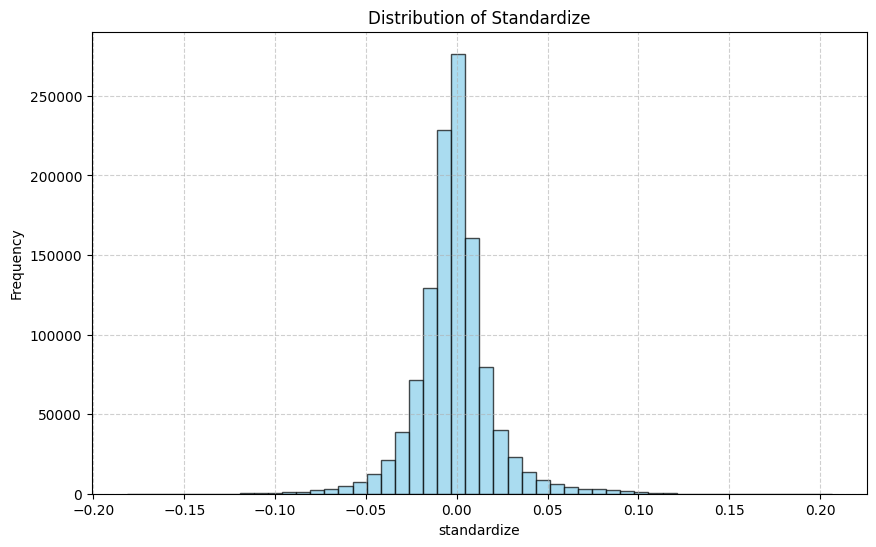

In [15]:
plt.figure(figsize = (10, 6))
plt.hist(panel_df["c_o_ret"].dropna(), bins = 50, color = "skyblue", edgecolor = "black", alpha = 0.7)
plt.title("Distribution of Standardize")
plt.xlabel("standardize")
plt.ylabel("Frequency")
plt.grid(True, linestyle = "--", alpha = 0.6)
plt.show()

### day_trading ratio sorted

#### first sort: day_trading ratio

In [4]:
ratio_sorted_df = panel_df.sort_values("當沖佔交易量比例").reset_index(drop = True)
ratio_sorted_df.reset_index(drop = True, inplace = True)
ratio_sorted_df.drop(index = ratio_sorted_df.index[1144860: ], inplace = True) # 舊的是從 1149120 開始drop

# 把 'stock' 移到第二個位置
cols = ratio_sorted_df.columns.tolist()
cols.remove("stock")
cols.insert(1, "stock")
ratio_sorted_df = ratio_sorted_df[cols]

# 累加 ret
ratio_sorted_df["cum_c_o_ret_t+1"] = ratio_sorted_df["c_o_ret_t+1"].cumsum()
mean = ratio_sorted_df["c_o_ret_t+1"].mean()
ratio_sorted_df["standardize"] = ratio_sorted_df["c_o_ret_t+1"] - mean
ratio_sorted_df["cum_standardize"] = ratio_sorted_df["standardize"].cumsum()

# 切掉錯誤資料


# print
ratio_sorted_df.to_csv("ratio_sorted_df.csv")
ratio_sorted_df

,Date,stock,Open,High,Low,Close,Volume,當日沖銷交易成交股數,當日沖銷交易買進成交金額,當日沖銷交易賣出成交金額,...,ShortSaleCashRepayment,ShortSaleLimit,ShortSaleSell,ShortSaleTodayBalance,ShortSaleYesterdayBalance,c_o_ret,c_o_ret_t+1,cum_c_o_ret_t+1,standardize,cum_standardize
0,2025-03-21,1108,15.10,15.15,15.00,15.05,623893.0,1000.0,15100.0,15050.0,...,0.0,101184.0,0.0,0.0,0.0,-0.003311,0.003333,0.003333,0.003667,3.667142e-03
1,2025-04-07,1102,42.55,42.55,42.55,42.55,4118408.0,7000.0,297850.0,297850.0,...,0.0,886640.0,5.0,17.0,16.0,0.000000,0.011534,0.014867,0.011868,1.553498e-02
2,2020-01-20,1109,19.90,20.05,19.85,19.90,520239.0,1000.0,19900.0,20000.0,...,0.0,85489.0,0.0,35.0,36.0,0.000000,-0.031579,-0.016712,-0.031245,-1.571016e-02
3,2020-06-05,1104,17.90,18.05,17.90,18.00,506618.0,1000.0,17950.0,18050.0,...,0.0,163402.0,0.0,1.0,1.0,0.005587,0.002778,-0.013934,0.003112,-1.259858e-02
4,2024-07-15,1201,18.50,18.55,18.50,18.50,470621.0,1000.0,18550.0,18500.0,...,0.0,126515.0,0.0,28.0,28.0,0.000000,-0.002695,-0.016629,-0.002362,-1.496019e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13064,2023-02-13,1108,11.50,11.95,11.30,11.55,1932565.0,1529000.0,17814300.0,17850100.0,...,0.0,101184.0,0.0,0.0,0.0,0.004348,-0.008621,-4.393863,-0.008287,-3.265286e-02
13065,2024-03-22,1203,51.40,52.00,50.40,51.60,39006.0,31000.0,1586400.0,1586600.0,...,0.0,60000.0,0.0,0.0,0.0,0.003891,0.003922,-4.389941,0.004255,-2.839748e-02
13066,2024-11-22,1108,14.50,15.15,14.45,14.55,1708892.0,1369000.0,20323100.0,20288200.0,...,0.0,101184.0,0.0,5.0,5.0,0.003448,-0.006826,-4.396767,-0.006492,-3.488961e-02
13067,2023-06-05,1110,18.35,18.60,18.35,18.60,634340.0,518000.0,9533350.0,9533100.0,...,0.0,143000.0,0.0,0.0,0.0,0.013624,0.037234,-4.359533,0.037568,2.678240e-03


findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Micro

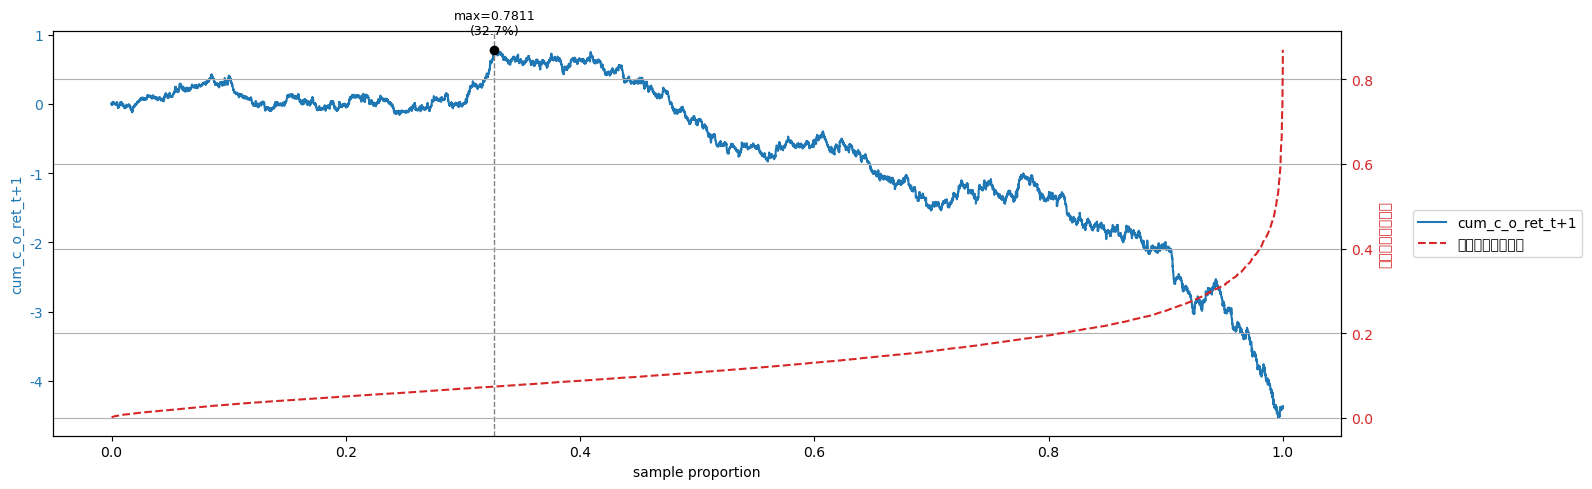

findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
/var/folders/np/82kc955j7g9_6x0dw88zjzw40000gn/T/ipykernel_48106/1578829302.py:159

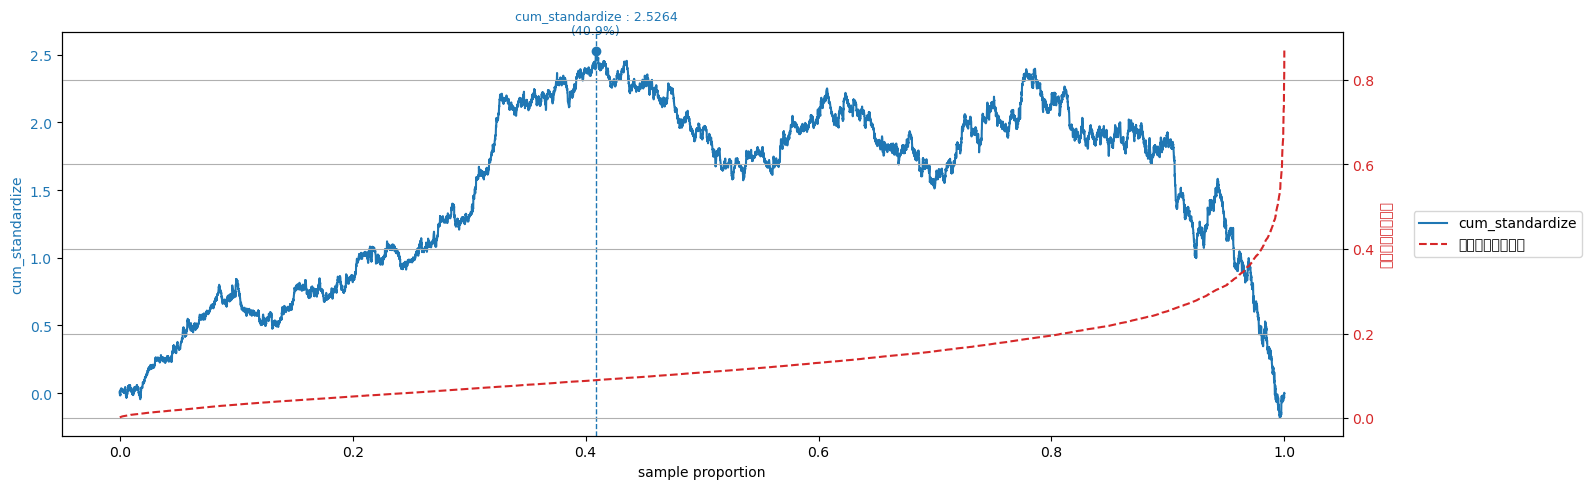

{'ly_max': None,
 'ly_point': {'index': 5345,
  'rank': 5346,
  'proportion': 0.4089830897543806,
  'x': 0.4089830897543806,
  'y': 2.5264409698966643},
 'ry_point': None}

In [18]:
sorted_plot(ratio_sorted_df, "index", "cum_c_o_ret_t+1", max_ly = True, ry = "當沖佔交易量比例")
sorted_plot(ratio_sorted_df, "index", "cum_standardize", max_ly = False, ry = "當沖佔交易量比例", point_ly_pct = 0.409)

In [14]:
"""全樣本分組"""
g11, g12 = group(ratio_sorted_df, "當沖佔交易量比例")

results1 = {}
group_names_1 = ["g11", "g12", "g13"]
groups1 = [g11, g12]

for name, g in zip(group_names_1, groups1):
    X = sm.add_constant(g[["當沖佔交易量比例", "BiasNorm"]])
    Y = g["standardize"]
    res = sm.OLS(Y, X).fit()
    results1[name] = res
print(results1["g12"].summary())

                       mean       std  count  missing
Group1 (0~20%)     0.030202  0.013305   2613        0
Group2 (20%~100%)  0.154863  0.092297  10456        0 
   comparison      t-stat  p-value
0   g1 vs g2 -132.703148      0.0
                            OLS Regression Results                            
Dep. Variable:            standardize   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.536
Date:                Sun, 14 Sep 2025   Prob (F-statistic):           0.000537
Time:                        10:00:23   Log-Likelihood:                 30394.
No. Observations:               10456   AIC:                        -6.078e+04
Df Residuals:                   10453   BIC:                        -6.076e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                    

In [24]:
"""maximization 右邊樣本的 standardize mean"""
# right_df = ratio_sorted_df.loc[720917: ]
right_df = ratio_sorted_df.loc[7000: ]
right_mean = right_df["standardize"].mean()
print(right_mean)

"""right_df's regression"""
X = sm.add_constant(right_df["當沖佔交易量比例"])
Y = right_df["c_o_ret_t+1"]
res = sm.OLS(Y, X).fit()
print(res.summary())

-0.0002609257977415304
                            OLS Regression Results                            
Dep. Variable:            c_o_ret_t+1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.565
Date:                Sun, 14 Sep 2025   Prob (F-statistic):            0.00597
Time:                        10:07:35   Log-Likelihood:                 17030.
No. Observations:                6069   AIC:                        -3.406e+04
Df Residuals:                    6067   BIC:                        -3.404e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.

#### second sort: BiasNorm

In [ ]:
"""sort by second factor"""

second_factor = ""
ratio_bias_sorted_right_df = right_df.sort_values(second_factor).reset_index(drop = True)
ratio_bias_sorted_right_df

findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Microsoft JhengHei' not found.
findfont: Font family 'Micro

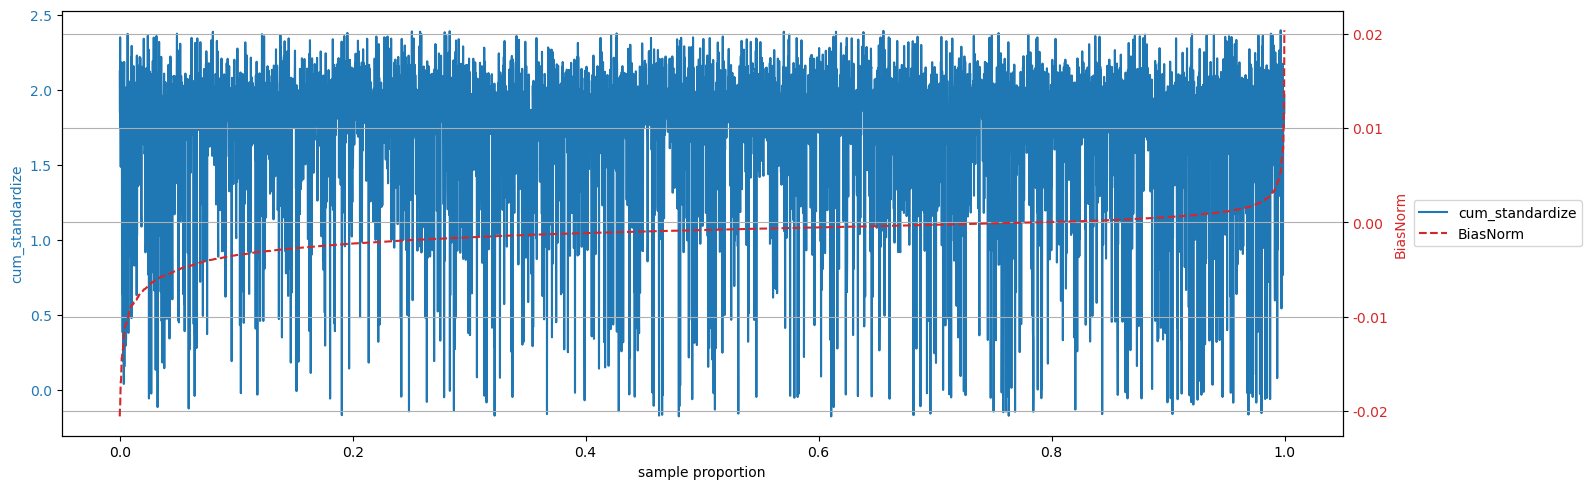

{'ly_max': None, 'ly_point': None, 'ry_point': None}

In [ ]:
sorted_plot(ratio_bias_sorted_right_df, "index", "cum_standardize", ry = second_factor)

### BiasNorm sorted

In [26]:
bias_sorted_df = panel_df.sort_values("當沖佔交易量比例").reset_index(drop = True)
bias_sorted_df.reset_index(drop = True, inplace = True)
bias_sorted_df.drop(index = bias_sorted_df.index[1149120: ], inplace = True)
bias_sorted_df = bias_sorted_df.sort_values("BiasNorm").reset_index(drop = True)

# 把 'stock' 移到第二個位置
cols = bias_sorted_df.columns.tolist()
cols.remove("stock")
cols.insert(1, "stock")
bias_sorted_df = bias_sorted_df[cols]

# 累加 ret
bias_sorted_df["cum_c_o_ret_t+1"] = bias_sorted_df["c_o_ret_t+1"].cumsum()
mean = bias_sorted_df["c_o_ret_t+1"].mean()
bias_sorted_df["standardize"] = bias_sorted_df["c_o_ret_t+1"] - mean
bias_sorted_df["cum_standardize"] = bias_sorted_df["standardize"].cumsum()

# print
bias_sorted_df.to_csv("bias_sorted_df.csv")
bias_sorted_df

,Date,stock,Open,High,Low,Close,Volume,當日沖銷交易成交股數,當日沖銷交易買進成交金額,當日沖銷交易賣出成交金額,...,ShortSaleCashRepayment,ShortSaleLimit,ShortSaleSell,ShortSaleTodayBalance,ShortSaleYesterdayBalance,c_o_ret,c_o_ret_t+1,cum_c_o_ret_t+1,standardize,cum_standardize
0,2020-09-22,1108,11.45,12.70,11.25,12.45,2242652.0,295000.0,3400450.0,3543400.0,...,0.0,101184.0,21.0,28.0,9.0,0.087336,-0.040650,-0.040650,-0.040317,-4.031660e-02
1,2024-11-01,1203,47.00,49.00,47.00,49.00,32398.0,4000.0,188450.0,196000.0,...,0.0,60000.0,0.0,0.0,0.0,0.042553,-0.009288,-0.049938,-0.008954,-4.927071e-02
2,2020-04-21,1110,16.10,16.10,15.00,16.00,80001.0,15000.0,229950.0,239100.0,...,0.0,143000.0,0.0,0.0,0.0,-0.006211,0.000000,-0.049938,0.000334,-4.893691e-02
3,2020-03-13,1110,15.70,15.75,14.65,15.75,92787.0,11000.0,164000.0,170250.0,...,0.0,143000.0,0.0,0.0,0.0,0.003185,-0.006410,-0.056349,-0.006076,-5.501335e-02
4,2020-03-23,1108,5.31,5.77,5.31,5.63,87100.0,9000.0,49670.0,51550.0,...,0.0,101184.0,0.0,0.0,0.0,0.060264,-0.020408,-0.076757,-0.020074,-7.508771e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13064,2020-03-24,1110,14.35,14.45,14.10,14.10,45001.0,1000.0,14450.0,14100.0,...,0.0,143000.0,0.0,0.0,5.0,-0.017422,0.031142,-4.459576,0.031476,-9.836598e-02
13065,2021-05-12,1110,17.10,17.30,15.30,15.30,1115004.0,253000.0,4061900.0,3946200.0,...,0.0,143000.0,0.0,1.0,1.0,-0.105263,0.063333,-4.396243,0.063667,-3.469884e-02
13066,2024-09-30,1203,50.00,51.00,49.40,50.10,26440.0,1000.0,51000.0,49450.0,...,0.0,60000.0,0.0,0.0,0.0,0.002000,0.022657,-4.373586,0.022991,-1.170797e-02
13067,2020-03-17,1108,6.21,6.21,5.82,5.82,225472.0,14000.0,85180.0,82540.0,...,0.0,101184.0,1.0,1.0,1.0,-0.062802,0.005076,-4.368510,0.005410,-6.298023e-03


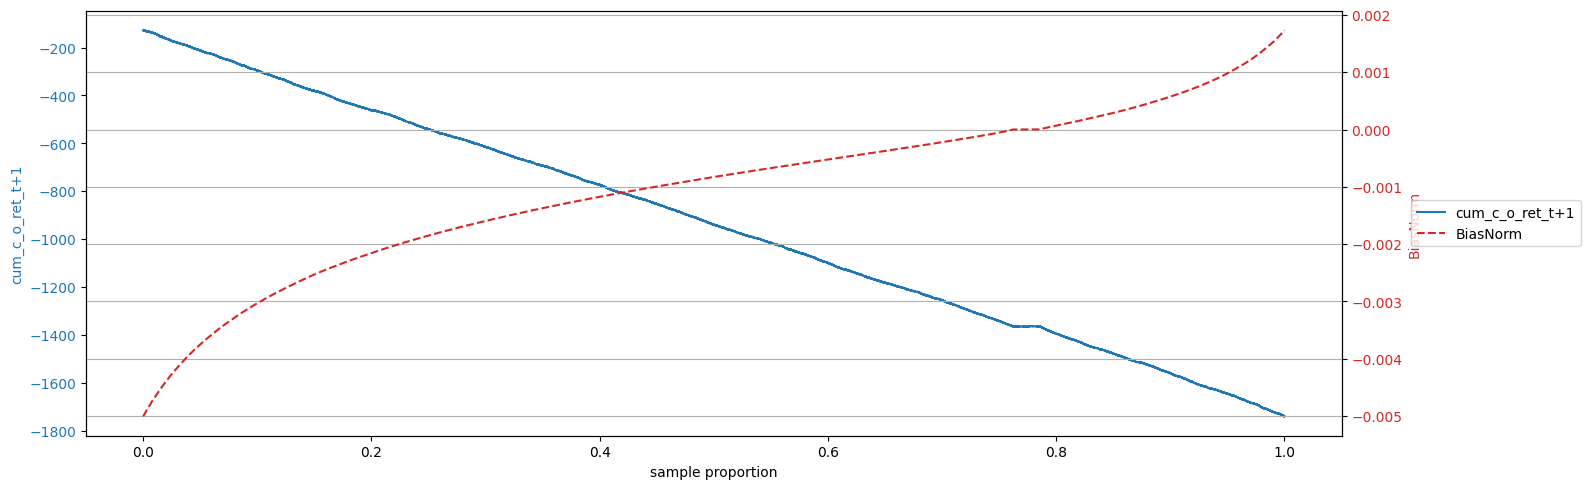

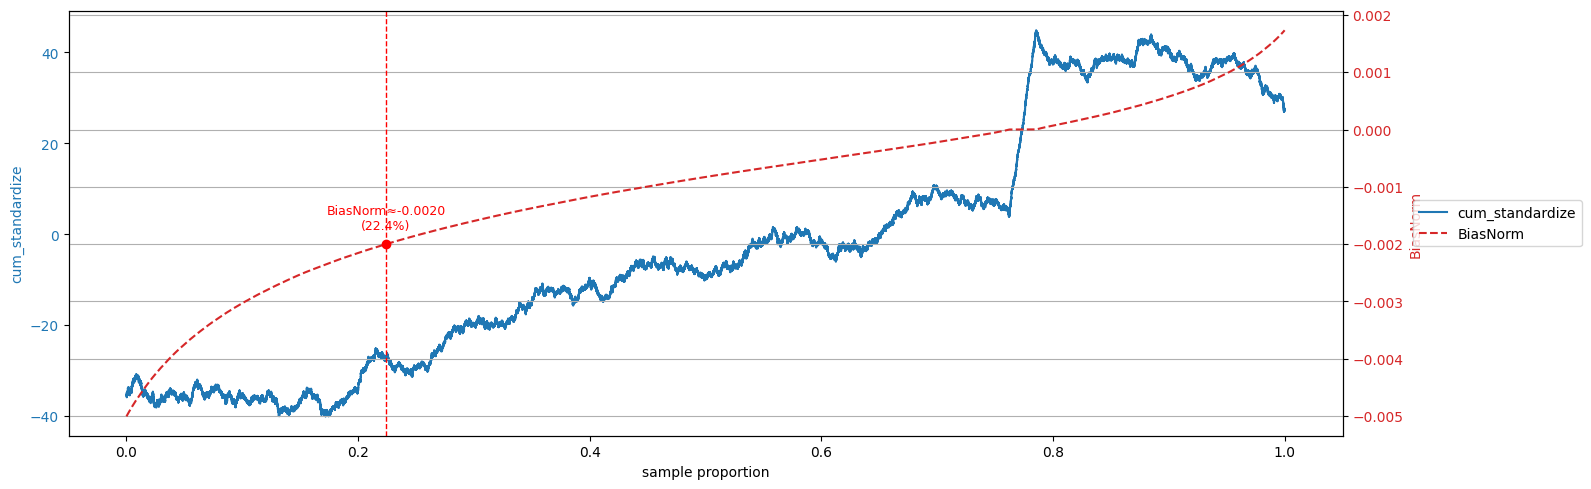

In [64]:
lower = bias_sorted_df["BiasNorm"].quantile(0.05)  # 下 % 分位數
upper = bias_sorted_df["BiasNorm"].quantile(0.95)  # 上 % 分位數
trimmed_df = bias_sorted_df[(bias_sorted_df["BiasNorm"] >= lower) & (bias_sorted_df["BiasNorm"] <= upper)]

sorted_plot(trimmed_df, "index", "cum_c_o_ret_t+1", max_ly = False, ry = "BiasNorm")
sorted_plot(trimmed_df, "index", "cum_standardize", max_ly = False, ry = "BiasNorm", point_ry = -0.002)

In [65]:
g21, g22, g23 = group(trimmed_df, "BiasNorm", point1 = 0.224, point2 = 0.762)

                      mean       std   count  missing
Group1 (0~20%)   -0.003073  0.000807  231663        0
Group2 (20~80%)  -0.000902  0.000545  556406        0
Group3 (80~100%)  0.000563  0.000472  246143        0 
   comparison       t-stat  p-value
0   g1 vs g2 -1186.715897      0.0
1   g2 vs g3 -1221.486313      0.0
2   g1 vs g3 -1885.843551      0.0


In [80]:
results2 = {}
group_names_2 = ["g21", "g22", "g23"]
groups2 = [g21, g22, g23]

for name, g in zip(group_names_2, groups2):
    X = sm.add_constant(g[["當沖佔交易量比例", "BiasNorm"]])
    Y = g["c_o_ret_t+1"]
    res = sm.OLS(Y, X).fit()
    results2[name] = res

print(results2["g22"].summary())

                            OLS Regression Results                            
Dep. Variable:            c_o_ret_t+1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     797.5
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:23:36   Log-Likelihood:             1.3853e+06
No. Observations:              556406   AIC:                        -2.771e+06
Df Residuals:                  556403   BIC:                        -2.770e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   6.73e-05      1.557      0.1

## regression

### macro

In [ ]:
"""concat 成 panel data"""

files = glob("test_data/*.csv")
dfs = []
for f in files:
    stock_id = f.split("\\")[-1].replace(".csv","")
    df = pd.read_csv(f, parse_dates = ["Date"])
    df["stock"] = stock_id
    df["c_o_spread"] = df["Close"] - df["Open"]         # 建立 Close - Open
    df["c_o_spread_t+1"] = df["c_o_spread"].shift(-1)
    dfs.append(df)

ratio_sorted_df = pd.concat(dfs, ignore_index = True)
ratio_sorted_df = ratio_sorted_df.sort_values(["Date","stock"])
ratio_sorted_df.dropna(inplace = True)

# 把 'stock' 移到第二個位置
cols = ratio_sorted_df.columns.tolist()
cols.remove("stock")
cols.insert(1, "stock")
ratio_sorted_df = ratio_sorted_df[cols]

In [93]:
"""fama macbeth regression"""

# cross sectional regression
rows = []
dates = []

vars_ = ["當沖佔交易量比例", "BiasNorm"]

for dt, g in ratio_sorted_df.groupby("Date"):
    Y = g["c_o_ret_t+1"]
    X = g[vars_]
    X = sm.add_constant(X)

    # 確保樣本不會太少
    if len(g) > X.shape[1] + 3:
        res = sm.OLS(Y, X).fit()
        rows.append(res.params.reindex(vars_).astype(float))
        dates.append(dt)

betas_df = pd.DataFrame(rows, index = pd.Index(dates, name = "Date")).sort_index()

# time series average
out = []
T = betas_df.shape[0]
X_time = sm.add_constant(np.ones(T))

# statistic
for col in betas_df.columns:
    series_t = betas_df[col].dropna()
    # 平均β
    beta_bar = series_t.mean()
    # NW-SE
    res_time = sm.OLS(series_t.values, X_time[:len(series_t)]).fit()
    cov = cov_hac(res_time)
    se_nw = np.sqrt(cov[0, 0])
    t_nw = beta_bar / se_nw
    out.append((col, beta_bar, se_nw, t_nw, len(series_t)))

res_table = pd.DataFrame(out, columns = ["var","beta_bar","SE_NW","t_NW","T"])
res_table

,var,beta_bar,SE_NW,t_NW,T
0,當沖佔交易量比例,-0.007673,0.000534,-14.362293,1379
1,BiasNorm,0.045269,0.016816,2.692021,1379


In [96]:
df = ratio_sorted_df[['Date','stock','c_o_ret_t+1','當沖佔交易量比例','BiasNorm']].copy()

# 1) 時間欄位轉成 datetime
df['Date'] = pd.to_datetime(df['Date'])

# 2) 先清 NaN
df = df.dropna(subset=['c_o_ret_t+1','當沖佔交易量比例','BiasNorm'])

# 3) （可選）winsorize 截尾，穩定估計
for col in ['c_o_ret_t+1','當沖佔交易量比例','BiasNorm']:
    lo, hi = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(lo, hi)

# 4) 設定 MultiIndex：entity 在前（stock），time 在後（Date）
df = df.set_index(['stock','Date']).sort_index()

y = df['c_o_ret_t+1']
X = df[['當沖佔交易量比例','BiasNorm']]

# （可選）加入常數項
X = X.copy()
X['const'] = 1.0

mod = FamaMacBeth(y, X)          # index 需是 (entity, time)
res = mod.fit(cov_type='kernel') # Newey–West 風格標準誤
print(res.summary)

                            FamaMacBeth Estimation Summary                           
Dep. Variable:                 c_o_ret_t+1   R-squared:                        0.0031
Estimator:                     FamaMacBeth   R-squared (Between):              0.2373
No. Observations:                  1149120   R-squared (Within):               0.0017
Date:                     Thu, Sep 11 2025   R-squared (Overall):              0.0031
Time:                             12:57:16   Log-likelihood                 2.902e+06
Cov. Estimator:    Fama-MacBeth Kernel Cov                                           
                                             F-statistic:                      1758.8
Entities:                              998   P-value                           0.0000
Avg Obs:                            1151.4   Distribution:               F(2,1149117)
Min Obs:                            2.0000                                           
Max Obs:                            1379.0   F-statist

In [ ]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     70.93
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.40e-42
Time:                        19:59:25   Log-Likelihood:                 236.94
No. Observations:                1347   AIC:                            -465.9
Df Residuals:                    1343   BIC:                            -445.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0542      0.009      5.761   

### industry

In [53]:
import requests
import pandas as pd

stock = "2330"  # 台積電
url = f"https://openapi.twse.com.tw/v1/exchangeReport/BWIBBU_d?stockNo={stock}"
data = requests.get(url, timeout=30, verify = False).json()

df = pd.DataFrame(data)
df["市值(元)"] = pd.to_numeric(df["市值(百萬元)"], errors="coerce") * 1_000_000

print(df[["日期", "證券代號", "證券名稱", "市值(元)"]])


c:\Users\ownme\anaconda3\envs\quant\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openapi.twse.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


KeyError: '市值(百萬元)'

## random forest

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

### naive random forest

In [16]:
"""預測方向"""

file["target"] = file["o_c_spread"].shift(-1)

data = file.dropna()

X = data[["當日沖銷交易賣出成交金額", "當沖佔交易量比例", "BiasNorm"]]
y = (data["target"] > 0).astype(int)

# 切資料
split_point = int(len(X) * 0.8)
X_train, X_test = X.iloc[: split_point], X.iloc[split_point: ]
y_train, y_test = y.iloc[: split_point], y.iloc[split_point: ]

rf = RandomForestClassifier(
    n_estimators = 300,     # 樹的數量
    max_depth = None,       # 不限制深度
    class_weight = "balanced_subsample",
    n_jobs = -1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# metrics
acc = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average = "binary", zero_division = 0)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f} | ROC-AUC: {auc:.3f}")
print("Confusion matrix:\n", cm)

# feature 重要性
imp = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})\
        .sort_values("Importance", ascending=False)

imp

Accuracy: 0.578 | Precision: 0.546 | Recall: 0.476 | F1: 0.509 | ROC-AUC: 0.561
Confusion matrix:
 [[97 49]
 [65 59]]


,Feature,Importance
2,BiasNorm,0.336074
0,當日沖銷交易賣出成交金額,0.335098
1,當沖佔交易量比例,0.328828


### target encoding random forest

In [17]:
def target_encode_timeseries(train: pd.DataFrame, valid: pd.DataFrame, col: str, target: str) -> pd.Series:
    """
    train: 訓練集 (只用過去資料)
    valid: 驗證集 (未來資料)
    col:   要做 target encoding 的欄位 (例如 'Industry')
    target: 標籤欄位 (例如 'target')
    """
    # get mean of train data
    mapping = train.groupby(col)[target].mean()

    # encode valid data by mean of train
    valid_encoded = valid[col].map(mapping)

    return valid_encoded

In [21]:
tscv = TimeSeriesSplit(n_splits = 5)
X = data[["Industry", "當沖佔交易量比例"]].copy()

KeyError: "['Industry'] not in index"